# This notebook is about preparing input data to regression techniques

## Import Libararies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm

## Reading Data

In [2]:
data = pd.read_csv("RentDatanase6.csv")

In [3]:
data.shape

(2556, 25)

In [4]:
data = data.drop("Unnamed: 0", axis = 1)

## Analyzing the distribution of target vector

c:\users\sergey\anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 26010.91 and sigma = 36358.30



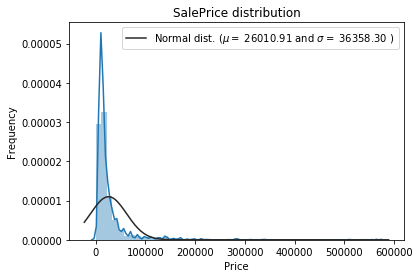

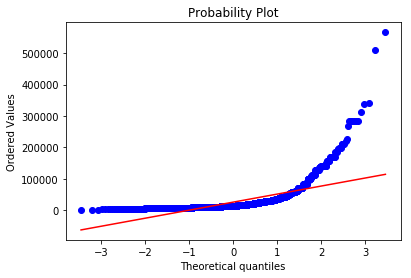

Skewness: 5.459849
Kurtosis: 47.193325


In [5]:
# Plot Histogram
sns.distplot(data['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)
plt.show()

print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

It's not seems like a normal distribution, especially due to the kurtosis score but maybe it can be fixed. Come back to it later.

### Removing unnecessary categorical and numerical data

In [6]:
data = data.drop('Rate', axis = 1)
data = data.drop('AdPrice', axis = 1)

In [7]:
data = data.drop('Metro', axis = 1)
data = data.drop('Street', axis = 1)
data = data.drop('StreetUA', axis = 1)
data = data.drop('ID', axis = 1)
data = data.drop('Info', axis = 1)
data = data.drop('District', axis = 1)
data = data.drop('Adress', axis = 1)
data = data.drop('Center', axis = 1)
data = data.drop('Hospital', axis = 1)
data = data.drop(['Kindergarten', 'School'], axis = 1)

## Check nan vales

In [8]:
data.isnull().sum()

Rooms              0
Floor              0
TotalFloor         0
KitchenArea        0
LivingArea         0
TotalArea          0
OfferType        305
Walls              0
WaterHeatType      0
Price              0
LocNum             0
dtype: int64

In [9]:
data['OfferType'].value_counts()

від посередника                                1724
від власника                                    325
від представника господаря (без комісійних)     202
Name: OfferType, dtype: int64

I will replace nan values with 'від посередника' because this value occurs the most times

In [10]:
for i in range(data.shape[0]):
    if type(data.loc[i, 'OfferType']) != type('a'):
        data.loc[i, 'OfferType'] = 'від посередника'

In [11]:
data.columns

Index(['Rooms', 'Floor', 'TotalFloor', 'KitchenArea', 'LivingArea',
       'TotalArea', 'OfferType', 'Walls', 'WaterHeatType', 'Price', 'LocNum'],
      dtype='object')

Get rid of the nan values by this point

## Now let's inspect the distributions of other features  

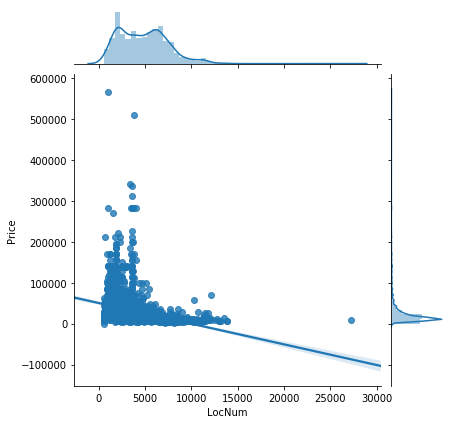

In [12]:
# locNum vs Price
sns.jointplot(x=data['LocNum'], y=data['Price'], kind='reg')

In [13]:
# Remove outliars
data = data.drop(data[(data['LocNum']>25000)].index).reset_index(drop=True)
data = data.drop(data[(data['Price']>400000)].index).reset_index(drop=True)

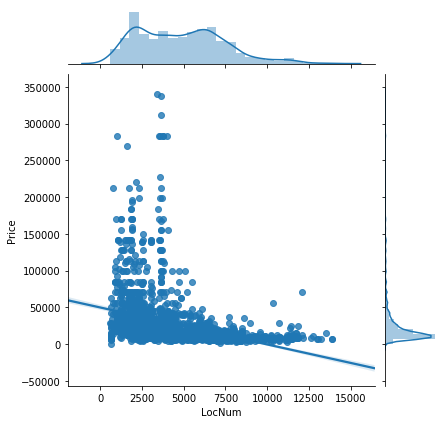

In [14]:
# locNum vs Price
sns.jointplot(x=data['LocNum'], y=data['Price'], kind='reg')

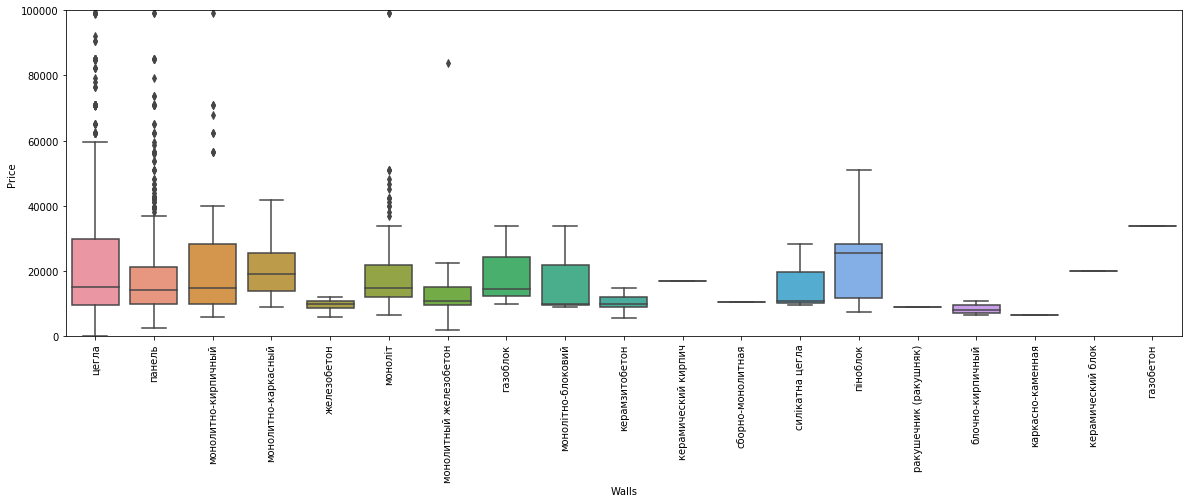

In [15]:
# Walls vs Sale Price
var = 'Walls'
data1 = pd.concat([data['Price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="Price", data=data1)
fig.axis(ymin=0, ymax=100000);
plt.xticks(rotation=90);

In [16]:
data.shape

(2553, 11)

In [17]:
data['Walls'].unique()

array(['цегла', 'панель', 'монолитно-кирпичный', 'монолитно-каркасный',
       'железобетон', 'моноліт', 'монолитный железобетон', 'газоблок',
       'монолітно-блоковий', 'керамзитобетон', 'керамический кирпич',
       'сборно-монолитная', 'силікатна цегла', 'піноблок',
       'ракушечник (ракушняк)', 'блочно-кирпичный', 'каркасно-каменная',
       'керамический блок', 'газобетон'], dtype=object)

In [18]:
# Remove outliars
data = data.drop(data[(data['Walls'] == 'цегла') & (data['Price']>40000)].index).reset_index(drop=True)
data = data.drop(data[(data['Walls'] == 'панель') & (data['Price']>38000)].index).reset_index(drop=True)
data = data.drop(data[(data['Walls'] == 'монолитно-кирпичный') & (data['Price']>40000)].index).reset_index(drop=True)
data = data.drop(data[(data['Walls'] == 'моноліт') & (data['Price']>28000)].index).reset_index(drop=True)
data = data.drop(data[(data['Walls'] == 'монолитный железобетон') & (data['Price']>37000)].index).reset_index(drop=True)
data = data.drop(data[(data['Walls'] == 'керамический кирпич')].index).reset_index(drop=True)
data = data.drop(data[(data['Walls'] == 'сборно-монолитная')].index).reset_index(drop=True)
data = data.drop(data[(data['Walls'] == 'ракушечник (ракушняк)')].index).reset_index(drop=True)
data = data.drop(data[(data['Walls'] == 'каркасно-каменная')].index).reset_index(drop=True)
data = data.drop(data[(data['Walls'] == 'керамический блок')].index).reset_index(drop=True)
data = data.drop(data[(data['Walls'] == 'газобетон')].index).reset_index(drop=True)

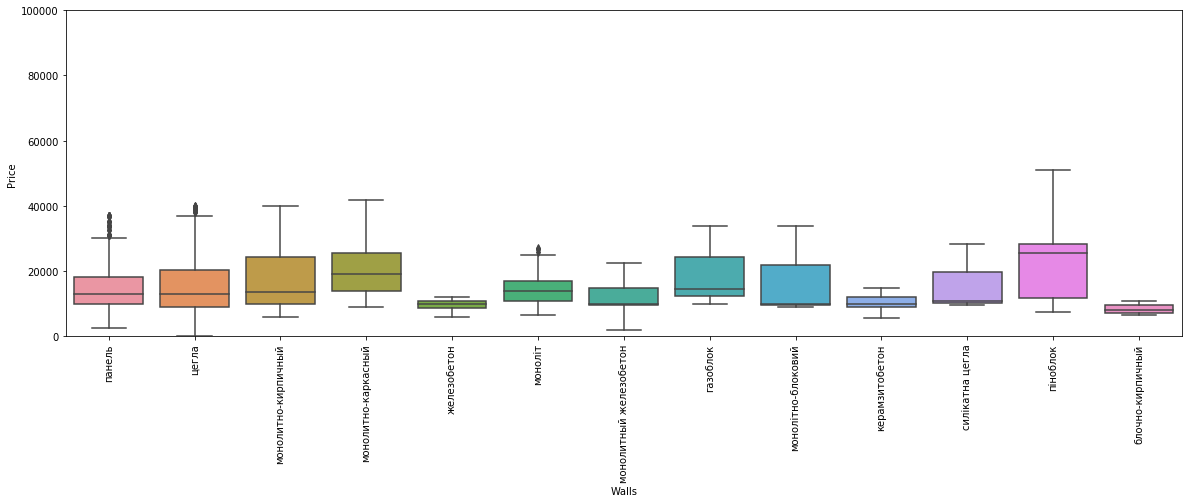

In [19]:
# Walls vsPrice
var = 'Walls'
data1 = pd.concat([data['Price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="Price", data=data1)
fig.axis(ymin=0, ymax=100000);
plt.xticks(rotation=90);

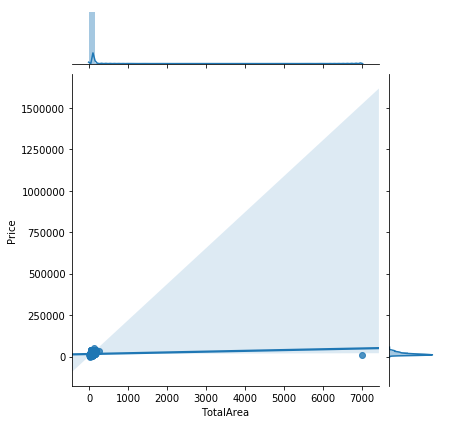

In [20]:
# TotalArea vs Price
sns.jointplot(x=data['TotalArea'], y=data['Price'], kind='reg')

In [21]:
# Remove outliars
data = data.drop(data[(data['TotalArea']>6000) & (data['Price']<100000)].index).reset_index(drop=True)

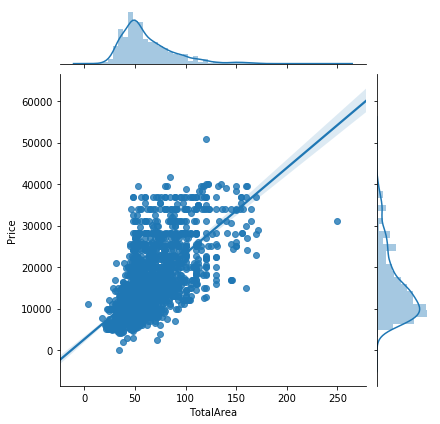

In [22]:
# TotalArea vs Price
sns.jointplot(x=data['TotalArea'], y=data['Price'], kind='reg')

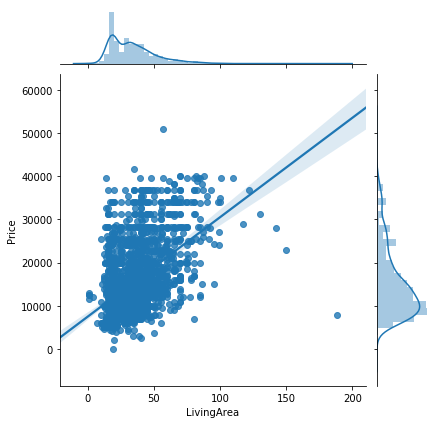

In [23]:
# LivingArea vs Price
sns.jointplot(x=data['LivingArea'], y=data['Price'], kind='reg')

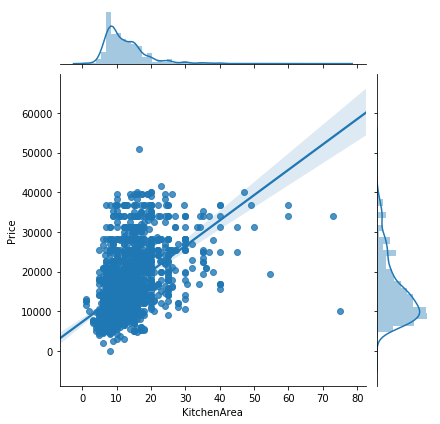

In [24]:
# KitchenArea vs Price
sns.jointplot(x=data['KitchenArea'], y=data['Price'], kind='reg')

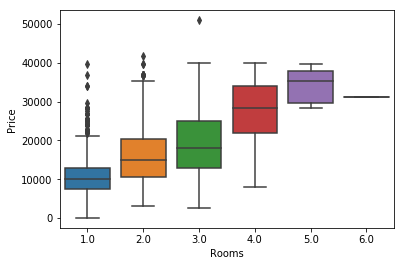

In [25]:
# Rooms vs Price
sns.boxplot(x=data['Rooms'], y=data['Price'])

In [26]:
# Remove outliars
data = data.drop(data[(data['Rooms'] == 1.0) & (data['Price']>20000)].index).reset_index(drop=True)
data = data.drop(data[(data['Rooms'] == 2.0) & (data['Price']>35000)].index).reset_index(drop=True)
data = data.drop(data[(data['Rooms'] == 3.0) & (data['Price']>45000)].index).reset_index(drop=True)
data = data.drop(data[(data['Rooms'] == 6.0)].index).reset_index(drop=True)

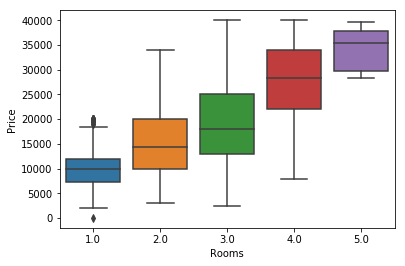

In [27]:
# Rooms vs Price
sns.boxplot(x=data['Rooms'], y=data['Price'])

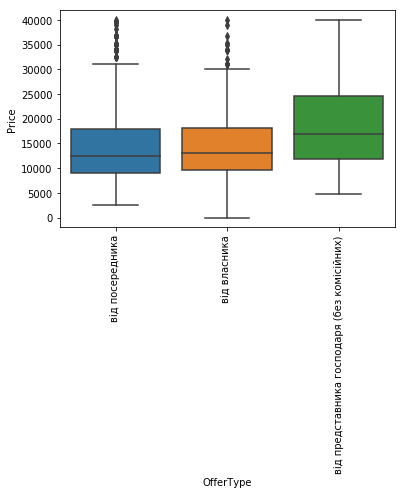

In [28]:
# OfferType vs Price
sns.boxplot(x=data['OfferType'], y=data['Price'])
plt.xticks(rotation=90);

## Now let's fix target vector

We do this because prediction score strongly depends on distribution of variables


 mu = 9.49 and sigma = 0.51



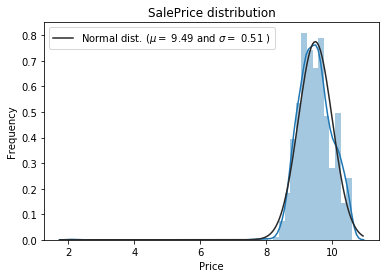

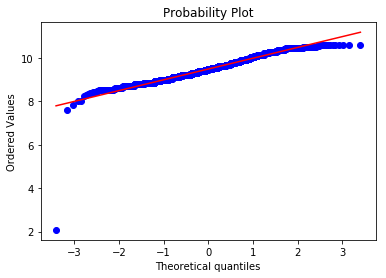

Skewness: -1.280058
Kurtosis: 19.508012


In [29]:
# Let's apply log1p function which is log(1+x) to all elements of the column
data["Price"] = np.log1p(data["Price"])

#Check the new distribution 
sns.distplot(data["Price"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data["Price"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data["Price"], plot=plt)
plt.show()

y_train = data.Price.values

print("Skewness: %f" % data["Price"].skew())
print("Kurtosis: %f" % data["Price"].kurt())

Well now it's almost normal distribution, nice.

In [30]:
data = pd.get_dummies(data)

In [31]:
data.head()

,Rooms,Floor,TotalFloor,KitchenArea,LivingArea,TotalArea,WaterHeatType,Price,LocNum,OfferType_від власника,...,Walls_керамзитобетон,Walls_монолитно-каркасный,Walls_монолитно-кирпичный,Walls_монолитный железобетон,Walls_моноліт,Walls_монолітно-блоковий,Walls_панель,Walls_піноблок,Walls_силікатна цегла,Walls_цегла
0,1.0,20.0,24.0,25.0,17.0,63.0,False,9.798183,7105.8,0,...,0,0,0,0,0,0,1,0,0,0
1,2.0,7.0,10.0,18.0,55.0,73.0,False,10.308986,1962.0,1,...,0,0,0,0,0,0,0,0,0,1
2,1.0,20.0,27.0,11.4,17.4,44.0,True,9.210440,7233.6,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,11.0,22.0,14.0,18.0,47.0,False,9.190240,7422.0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.0,10.0,15.0,15.0,48.0,105.0,False,9.680406,5537.6,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
data.to_csv("data_prepared.csv", encoding='utf-8')